In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import scipy.io.wavfile
import copy


---
# VIDEO: High-pass filters
---


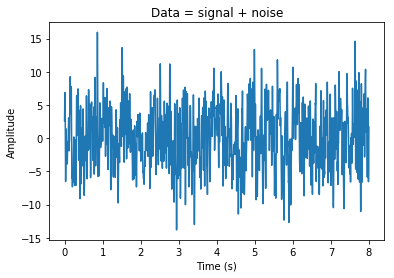

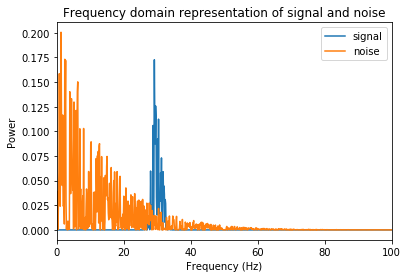

In [3]:
# generate 1/f noise
N   = 8000
fs  = 1000
as1 = np.random.rand(N) * np.exp(-np.arange(0,N)/200)
fc  = as1 * np.exp(1j*2*np.pi*np.random.rand(len(as1)))
noise = np.real(scipy.fftpack.ifft(fc)) * N



### create frequency-domain Gaussian
hz = np.linspace(0,fs,N)
s  = 4*(2*np.pi-1)/(4*np.pi); # normalized width
x  = hz-30                    # shifted frequencies
fg = np.exp(-.5*(x/s)**2)     # gaussian

fc = np.random.rand(N) * np.exp(1j*2*np.pi*np.random.rand(N))
fc = fc * fg

# generate signal from Fourier coefficients, and add noise
signal1 = np.real( scipy.fftpack.ifft(fc) )*N
data = signal1 + noise
time = np.arange(0,N)/fs


### plot the data
plt.plot(time,data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data = signal + noise')
plt.show()

plt.plot(hz,np.abs(scipy.fftpack.fft(signal1)/N)**2,label='signal')
plt.plot(hz,np.abs(scipy.fftpack.fft(noise)/N)**2,label='noise')
plt.legend()
plt.xlim([0,100])
plt.title('Frequency domain representation of signal and noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


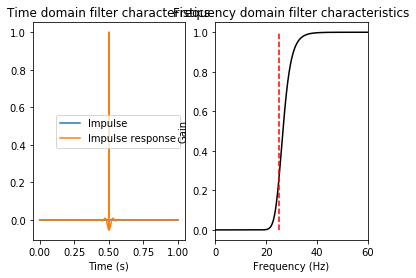

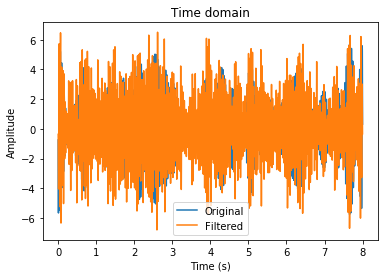

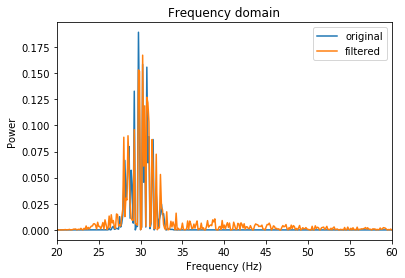

In [3]:
## now for high-pass filter

# specify filter cutoff (in Hz)
filtcut = 25

# generate filter coefficients (Butterworth)
filtb,filta = signal.butter(7,filtcut/(fs/2),btype='high')

# test impulse response function (IRF)
impulse  = np.zeros(1001)
impulse[501] = 1
fimpulse = signal.filtfilt(filtb,filta,impulse)
imptime  = np.arange(0,len(impulse))/fs


# plot impulse and IRF
plt.subplot(121)
plt.plot(imptime,impulse,label='Impulse')
plt.plot(imptime,fimpulse/np.max(fimpulse),label='Impulse response')
plt.xlabel('Time (s)')
plt.legend()
plt.title('Time domain filter characteristics')


# plot spectrum of IRF
plt.subplot(122)
hz = np.linspace(0,fs/2,3000)
imppow = np.abs(scipy.fftpack.fft(fimpulse,2*len(hz)))**2
plt.plot(hz,imppow[:len(hz)],'k')
plt.plot([filtcut,filtcut],[0,1],'r--')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency domain filter characteristics')
plt.show()


# now filter the data and compare against the original
fdata = signal.filtfilt(filtb,filta,data)
plt.plot(time,signal1,label='Original')
plt.plot(time,fdata,label='Filtered')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()


### power spectra of original and filtered signal
signalX = np.abs(scipy.fftpack.fft(signal1)/N)**2
fdataX  = np.abs(scipy.fftpack.fft(fdata)/N)**2
hz = np.linspace(0,fs,N)

plt.plot(hz,signalX[:len(hz)],label='original')
plt.plot(hz,fdataX[:len(hz)],label='filtered')
plt.xlim([20,60])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.show()


---
# VIDEO: Narrowband filters
---


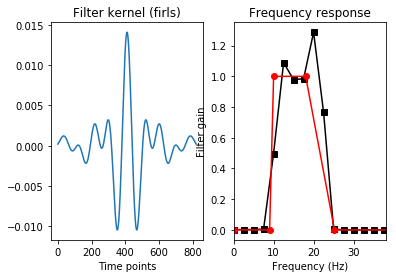

In [4]:
# define filter parameters
lower_bnd = 10 # Hz
upper_bnd = 18 # Hz

lower_trans = .1
upper_trans = .4

samprate  = 2048 # Hz
filtorder = 4*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-lower_trans), lower_bnd, upper_bnd, \
                upper_bnd+upper_bnd*upper_trans,  samprate/2 ]

filterkern = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern))**2


# let's see it
plt.subplot(121)
plt.plot(filterkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')


# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

# make the plot look nicer
plt.xlim([0,upper_bnd+20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()


/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as

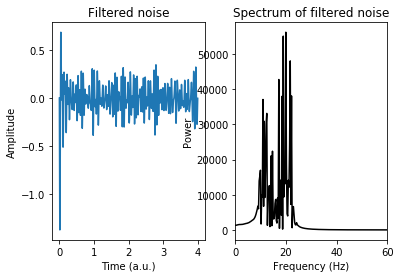

In [15]:
## now apply to random noise data

filtnoise = signal.filtfilt(filterkern,1,np.random.randn(samprate*4))
timevec = np.arange(0,len(filtnoise))/samprate

# plot time series
plt.subplot(121)
plt.plot(timevec,filtnoise)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Filtered noise')


# plot power spectrum
noisepower = np.abs(scipy.fftpack.fft(filtnoise))**2
plt.subplot(122)
plt.plot(np.linspace(0,samprate,len(noisepower)),noisepower,'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Spectrum of filtered noise')
plt.show()


---
# VIDEO: Two-stage wide-band filter
---


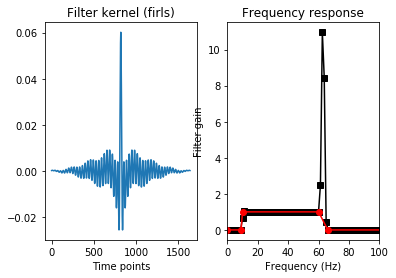

In [16]:
# define filter parameters
lower_bnd = 10 # Hz
upper_bnd = 60 # Hz

transw = .1

samprate  = 2048 # Hz
filtorder = 8*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-transw), lower_bnd, upper_bnd, upper_bnd+upper_bnd*transw, samprate/2 ]

filterkern = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern))**2


## plots
plt.subplot(121)
plt.plot(filterkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

plt.xlim([0,upper_bnd+40])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()


/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as

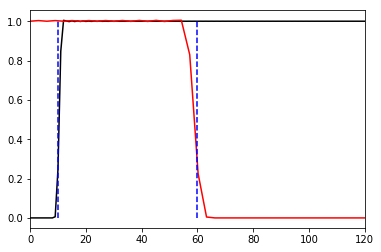

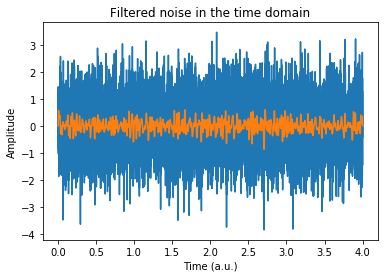

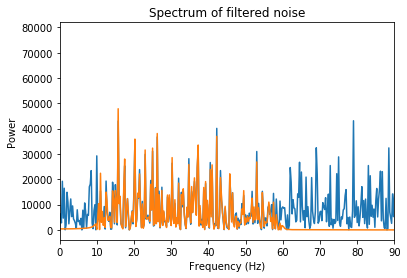

In [7]:
## generate white noise signal
N = samprate*4
noise = np.random.randn(N)
timevec = np.arange(0,len(noise))/samprate


## the better way to filter...


### first apply a high-pass filter
forder = int(10*samprate/lower_bnd)+1
filtkern = signal.firwin(forder,lower_bnd,pass_zero=False,fs=samprate)

# spectrum of kernel
hz = np.linspace(0,samprate/2,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'k')

# zero-phase-shift filter with reflection
fnoise = signal.filtfilt(filtkern,1,noise)



### repeat for low-pass filter
forder = 20*int(samprate/upper_bnd)+1
filtkern = signal.firwin(forder,upper_bnd,fs=samprate,pass_zero=True)

# spectrum of kernel
hz = np.linspace(0,samprate/2,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filtkern))**2

plt.plot(hz,filterpow[:len(hz)],'r')
plt.plot([lower_bnd, lower_bnd],[0,1],'b--')
plt.plot([upper_bnd, upper_bnd],[0,1],'b--')
plt.xlim([0,upper_bnd*2])

plt.show()


## now filter the filtered signal
fnoise = signal.filtfilt(filtkern,1,fnoise)


# make some plots
plt.plot(timevec,noise,label='noise')
plt.plot(timevec,fnoise,label='filtered noise')
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Filtered noise in the time domain')
plt.show()


# plot power spectrum
noiseX  = np.abs(scipy.fftpack.fft(noise))**2
fnoiseX = np.abs(scipy.fftpack.fft(fnoise))**2
hz = np.linspace(0,samprate,len(fnoise))

plt.plot(hz,noiseX,label='Noise')
plt.plot(hz,fnoiseX,label='Filtered noise')
plt.xlim([0,upper_bnd*1.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Spectrum of filtered noise')
plt.show()


---
# VIDEO: Quantifying roll-off characteristics
---


In [8]:
## create a windowed sinc filter

# simulation parameters
srate = 1000
time  = np.arange(-4,4,1/srate)
pnts  = len(time)

# FFT parameters
nfft = 10000
hz   = np.linspace(0,srate/2,int(np.floor(nfft/2)+1))

filtcut  = 15
sincfilt = np.sin(2*np.pi*filtcut*time) / time

# adjust NaN and normalize filter to unit-gain
sincfilt[~np.isfinite(sincfilt)] = np.max(sincfilt)
sincfilt = sincfilt/np.sum(sincfilt)

# windowed sinc filter
sincfiltW = sincfilt * signal.windows.hann(pnts)

# spectrum of filter
sincX = 10*np.log10(np.abs(scipy.fftpack.fft(sincfiltW,n=nfft))**2)
sincX = sincX[:len(hz)]

/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [9]:
## create a Butterworth high-pass filter

# generate filter coefficients (Butterworth)
filtb,filta = signal.butter(5,filtcut/(srate/2),btype='lowpass')

# test impulse response function (IRF)
impulse  = np.zeros(1001)
impulse[500] = 1
fimpulse = signal.filtfilt(filtb,filta,impulse)

# spectrum of filter response
butterX = 10*np.log10(np.abs(scipy.fftpack.fft(fimpulse,nfft))**2)
butterX = butterX[:len(hz)]


/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


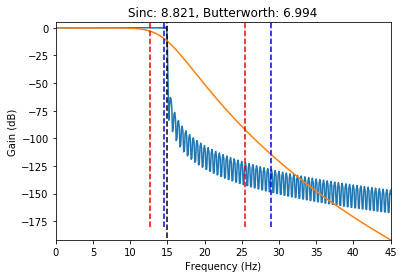

In [10]:
## plot frequency responses

plt.plot(hz,sincX)
plt.plot(hz,butterX)

plotedge = int(np.argmin( (hz-filtcut*3)**2 ))
plt.xlim([0,filtcut*3])
plt.ylim([np.min((butterX[plotedge], sincX[plotedge])), 5])
plt.plot([filtcut,filtcut],[-190, 5],'k--')



# find -3 dB after filter edge
filtcut_idx = np.min( (hz-filtcut)**2 )

sincX3db   = np.argmin( (sincX--3)**2 )
butterX3db = np.argmin( (butterX--3)**2 )

# add to the plot
plt.plot([hz[sincX3db],hz[sincX3db]],[-180,5],'b--')
plt.plot([hz[butterX3db],hz[butterX3db]],[-180,5],'r--')



# find double the frequency
sincXoct   = np.argmin( (hz-hz[sincX3db]*2)**2 )
butterXoct = np.argmin( (hz-hz[butterX3db]*2)**2 )

# add to the plot
plt.plot([hz[sincXoct],hz[sincXoct]],[-180,5],'b--')
plt.plot([hz[butterXoct],hz[butterXoct]],[-180,5],'r--')



# find attenuation from that point to double its frequency
sincXatten   = sincX[sincX3db*2]
butterXatten = butterX[butterX3db*2]

sincXrolloff   = (sincX[sincX3db]-sincX[sincXoct]) / (hz[sincXoct]-hz[sincX3db])
butterXrolloff = (butterX[butterX3db]-butterX[butterXoct]) / (hz[butterXoct]-hz[butterX3db])

# report!
plt.title('Sinc: %.3f, Butterworth: %.3f' %(sincXrolloff,butterXrolloff) )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.show()


---
# VIDEO: Remove electrical line noise and its harmonics
---


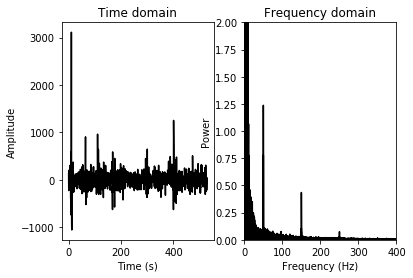

In [12]:
# load data
linedata = sio.loadmat('lineNoiseData.mat')
data  = np.squeeze(linedata['data'])
srate = linedata['srate'][0]

# time vector
pnts = len(data)
time = np.arange(0,pnts)/srate
time = time.T

# compute power spectrum and frequencies vector
pwr = np.abs(scipy.fftpack.fft(data)/pnts)**2
hz  = np.linspace(0,srate,pnts)


### plotting
# time-domain signal
plt.subplot(121)
plt.plot(time[0:-1:1000],data[0:-1:1000],'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')

# plot power spectrum
plt.subplot(122)
plt.plot(hz,pwr,'k')
plt.xlim([0,400])
plt.ylim([0,2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.show()

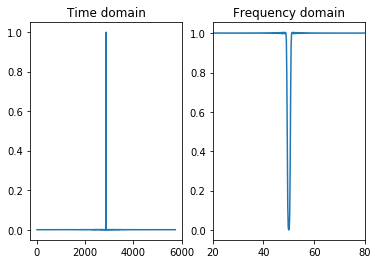

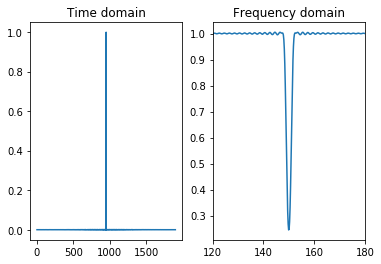

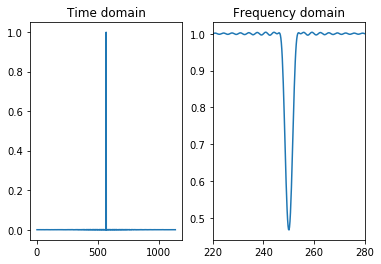

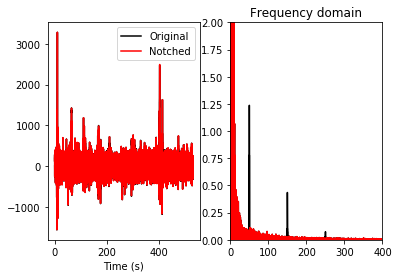

In [13]:
## narrowband filter to remove line noise

frex2notch = [ 50, 150, 250 ]

# initialize filtered signal
datafilt = data

# loop over frequencies
for fi in range(0,len(frex2notch)):
    
    # create filter kernel using firwin (fir1 in MATLAB)
    frange = [frex2notch[fi]-.5, frex2notch[fi]+.5]
    order  = int( 150*(srate/frange[0]) )
    order  = order + ~order%2
    
    # filter kernel
    filtkern = signal.firwin( order,frange,pass_zero=True,fs=srate )
    
    # visualize the kernel and its spectral response
    plt.subplot(121)
    plt.plot(filtkern)
    plt.title('Time domain')
    
    plt.subplot(122)
    plt.plot(np.linspace(0,srate,10000),np.abs(scipy.fftpack.fft(filtkern,10000))**2)
    plt.xlim([frex2notch[fi]-30, frex2notch[fi]+30])
    plt.title('Frequency domain')
    plt.show()
    
    # recursively apply to data
    datafilt = signal.filtfilt(filtkern,1,datafilt)
    
### plot the signal
plt.subplot(121)
plt.plot(time,data,'k',label='Original')
plt.plot(time,datafilt,'r',label='Notched')
plt.xlabel('Time (s)')
plt.legend()


# compute the power spectrum of the filtered signal
pwrfilt = np.abs(scipy.fftpack.fft(datafilt)/pnts)**2

# plot power spectrum
plt.subplot(122)
plt.plot(hz,pwr,'k',label='Original')
plt.plot(hz,pwrfilt,'r',label='Notched')
plt.xlim([0,400])
plt.ylim([0,2])
plt.title('Frequency domain')
plt.show()


---
# VIDEO: Use filtering to separate birds in a recording
---


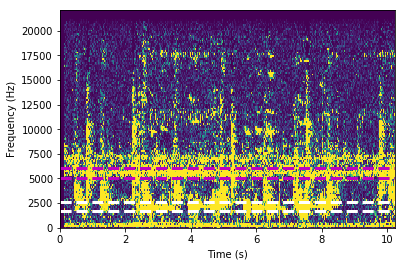

In [17]:
# load in birdcall
fs,bc = scipy.io.wavfile.read('XC403881.wav')


# time-frequency analysis via spectrogram (see section on spectral methods)
frex,time,pwr = scipy.signal.spectrogram(bc[:,0],fs)
plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')


# frequency ranges
frange = [ [1700, 2600], [5100, 6100] ]

# draw boundary lines on the plot
colorz = 'wm';
for fi in range(0,len(frange)):
    plt.plot([time[0],time[-1]],[frange[fi][0],frange[fi][0]],colorz[fi]+'--',linewidth=3)
    plt.plot([time[0],time[-1]],[frange[fi][1],frange[fi][1]],colorz[fi]+'--',linewidth=3)

plt.show()

In [18]:
## compute and apply FIR filters

# initialize output matrix
filteredSig = np.zeros((2,2,len(bc)))

# loop over filters
for filteri in range(len(frange)):
    
    # design filter kernel
    order    = round( 10*(fs/frange[filteri][0]) )
    order    += ~order%2
    filtkern = signal.firwin(order,frange[filteri],fs=fs,pass_zero=False)
    
    # loop over channels
    for chani in range(2):
        
        # get data from this channel
        dat1chan = bc[:,chani]
        
        # zero-phase-shift filter
        fsig = signal.filtfilt(filtkern,1,dat1chan)
        # enter into the matrix
        filteredSig[filteri,chani,:] = fsig
        

/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/mxc/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as

In [19]:
## play sounds

from IPython.display import Audio

# # original
# Audio(np.array(bc[:,0]), rate=fs)

# # lower frequency range
# Audio(np.array(filteredSig[0,0,:]), rate=fs)

# higher frequency range
Audio(np.array(filteredSig[1,0,:]), rate=fs)
